## Importing Libraries

In [243]:
import numpy as np
import pandas as pd
from numpy.random import normal
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")

## Reading and Pre Processing Options Data 

In [244]:
# merged_data contains all values from call_data.csv and put_data.csv merged together
# A new column 'iv' is also added which is absolute difference between Underlying Value and Strike Price
# Columns for Data of Call option are named ending with '_c' to differentitate between call option and put option data
merged_n=pd.read_csv("merged_data.csv")
merged_n

,Date,Expiry,Option type,Strike Price,Open,High,Low,Close,No. of contracts,Open Int,...,Strike Price c,Open_c,High_c,Low_c,Close_c,No. of contracts c,Open Int c,Change in OI c,SAME,ATM
0,3072023,6072023,PE,44700,188.1,190.7,71.2,87.65,1419239,1948125,...,44700,301.1,752,283.2,545.95,447375,428525,-837200,0,0
1,3072023,6072023,PE,44800,200,233.9,86.55,106.95,1752119,1625350,...,44800,215,670.5,215,466.15,876045,529400,-1871475,0,0
2,3072023,6072023,PE,44900,210.05,286.55,105.45,131.30,1807379,1136500,...,44900,169,592.25,169,389.55,1285314,477500,-621475,0,0
3,3072023,6072023,PE,45000,263.35,346.25,130.25,162.25,4469609,3246250,...,45000,159.75,516.7,140,320.15,4106234,1626150,-816675,0,0
4,3072023,6072023,PE,45100,358.25,410.95,160.45,199.70,2693718,1328825,...,45100,127,446.7,105.75,257.50,3507374,1283425,327925,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7886,29122023,27062024,PE,42000,-,-,-,260.00,-,210,...,42000,-,-,-,3400.00,-,30,-,0,0
7887,29122023,27062024,PE,45000,571,580,537.2,558.35,109,7095,...,45000,-,-,-,5160.00,-,15,-,0,0
7888,29122023,27062024,PE,46500,825.1,871.95,825.1,832.60,52,7005,...,46500,4100,4100,3894.7,3894.70,30,9210,-390,0,0
7889,29122023,27062024,PE,48000,1299.15,1333,1225,1248.00,61,4065,...,48000,3000,3065.95,2889,3057.50,43,10065,-,0,1


In [245]:
# Reading banknifty index data
index=pd.read_csv("index.csv")

In [246]:
# Calculating Daily Returns of Index Data
index['returns']=index['Close'].pct_change()
index

,Date,Open,High,Low,Close,Volume,returns
0,03-07-2023,44957.94922,45353.19922,44882.10156,45158.10156,228200,NaN
1,04-07-2023,45310.55078,45655.50000,45000.25000,45301.44922,463000,0.003174
2,05-07-2023,45169.69922,45418.89844,45073.39844,45151.80078,366300,-0.003303
3,06-07-2023,45060.55078,45417.50000,45042.60156,45339.89844,244900,0.004166
4,07-07-2023,45118.05078,45227.25000,44844.80078,44925.00000,220900,-0.009151
...,...,...,...,...,...,...,...
118,22-12-2023,47837.75000,48071.39844,47415.85156,47491.85156,165800,-0.007280
119,26-12-2023,47576.39844,47838.44922,47411.64844,47724.85156,118700,0.004906
120,27-12-2023,47818.50000,48347.64844,47806.69922,48282.19922,184900,0.011678
121,28-12-2023,48479.05078,48636.44922,48343.14844,48508.55078,391100,0.004688


In [247]:
# Storing the Difference between Open Interest of ITM Call Option and Open Interest of ITM Put Option in 'indiff' column
# Storing the Difference between Open Interest of OTM Call Option and Open Interest of OTM Put Option in 'outdiff' column
merged_n['indiff']=0
merged_n['outdiff']=0

for i in range(len(merged_n['indiff'])-5):
    if(merged_n['ATM'][i]==1):
        merged_n['indiff'][i]=(merged_n['Open Int c'][i]+merged_n['Open Int c'][i-1]+merged_n['Open Int c'][i-2]+merged_n['Open Int c'][i-3]+merged_n['Open Int c'][i-4]+merged_n['Open Int c'][i-5])-(merged_n['Open Int'][i]+merged_n['Open Int'][i+1]+merged_n['Open Int'][i+2]+merged_n['Open Int'][i+3]+merged_n['Open Int'][i+4]+merged_n['Open Int'][i+5])
        merged_n['outdiff'][i]=(merged_n['Open Int c'][i]+merged_n['Open Int c'][i+1]+merged_n['Open Int c'][i+2]+merged_n['Open Int c'][i+3]+merged_n['Open Int c'][i+4]+merged_n['Open Int c'][i+5])-(merged_n['Open Int'][i]+merged_n['Open Int'][i-1]+merged_n['Open Int'][i-2]+merged_n['Open Int'][i-3]+merged_n['Open Int'][i-4]+merged_n['Open Int'][i-5])

In [248]:
new_merge=merged_n.copy()
new_merge

,Date,Expiry,Option type,Strike Price,Open,High,Low,Close,No. of contracts,Open Int,...,High_c,Low_c,Close_c,No. of contracts c,Open Int c,Change in OI c,SAME,ATM,indiff,outdiff
0,3072023,6072023,PE,44700,188.1,190.7,71.2,87.65,1419239,1948125,...,752,283.2,545.95,447375,428525,-837200,0,0,0,0
1,3072023,6072023,PE,44800,200,233.9,86.55,106.95,1752119,1625350,...,670.5,215,466.15,876045,529400,-1871475,0,0,0,0
2,3072023,6072023,PE,44900,210.05,286.55,105.45,131.30,1807379,1136500,...,592.25,169,389.55,1285314,477500,-621475,0,0,0,0
3,3072023,6072023,PE,45000,263.35,346.25,130.25,162.25,4469609,3246250,...,516.7,140,320.15,4106234,1626150,-816675,0,0,0,0
4,3072023,6072023,PE,45100,358.25,410.95,160.45,199.70,2693718,1328825,...,446.7,105.75,257.50,3507374,1283425,327925,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7886,29122023,27062024,PE,42000,-,-,-,260.00,-,210,...,-,-,3400.00,-,30,-,0,0,0,0
7887,29122023,27062024,PE,45000,571,580,537.2,558.35,109,7095,...,-,-,5160.00,-,15,-,0,0,0,0
7888,29122023,27062024,PE,46500,825.1,871.95,825.1,832.60,52,7005,...,4100,3894.7,3894.70,30,9210,-390,0,0,0,0
7889,29122023,27062024,PE,48000,1299.15,1333,1225,1248.00,61,4065,...,3065.95,2889,3057.50,43,10065,-,0,1,0,0


In [249]:
# Dropping rows having Strike Price other than ATM
for i in range(len(new_merge['indiff'])):
    if(new_merge['indiff'][i]==0):
        new_merge.drop(index=i, inplace=True)
new_merge.reset_index(drop=True, inplace=True)
new_merge

,Date,Expiry,Option type,Strike Price,Open,High,Low,Close,No. of contracts,Open Int,...,High_c,Low_c,Close_c,No. of contracts c,Open Int c,Change in OI c,SAME,ATM,indiff,outdiff
0,3072023,6072023,PE,45200,421.65,485.15,197.2,245.50,3492281,1592025,...,382.25,78.75,203.65,5325154,2665625,1628100,0,1,3872800,334725
1,3072023,13072023,PE,45200,570.3,576.2,339.95,388.70,36764,106750,...,526.65,201,365.35,49444,144825,80725,0,1,418975,-188650
2,3072023,20072023,PE,45200,858.1,858.1,449,488.85,295,3050,...,606.75,458.85,501.80,332,3550,3550,0,1,4900,-16625
3,3072023,27072023,PE,45200,692.9,692.9,512,555.40,23986,49080,...,760.7,419.55,607.55,26300,71460,36285,0,1,533790,209745
4,3072023,31082023,PE,45200,830.55,1600,783,812.35,165,1470,...,1125.4,964.7,1033.80,11,90,90,0,1,15805,15695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,29122023,10012024,PE,48300,481.45,547.05,390.9,445.15,28409,38310,...,777.9,517.8,628.40,34144,47385,32940,0,1,19245,28080
825,29122023,17012024,PE,48300,605.1,660,510.55,581.80,576,2025,...,907.15,690.85,786.75,841,4545,3330,0,1,-315,20325
826,29122023,25012024,PE,48300,682,781.7,588.5,645.30,18929,53790,...,1063.4,833.35,958.40,13112,43020,21645,0,1,100470,-319380
827,29122023,31012024,PE,48300,855.55,855.6,680.1,710.15,337,1110,...,1158.65,931.35,1029.10,890,12225,7740,0,1,14445,7785


In [250]:
# Calculating difference between 'indiff' and 'outdiff' columns and storing in 'Total Diff'
new_merge['Total Diff']=new_merge['indiff']-new_merge['outdiff']
new_merge

,Date,Expiry,Option type,Strike Price,Open,High,Low,Close,No. of contracts,Open Int,...,Low_c,Close_c,No. of contracts c,Open Int c,Change in OI c,SAME,ATM,indiff,outdiff,Total Diff
0,3072023,6072023,PE,45200,421.65,485.15,197.2,245.50,3492281,1592025,...,78.75,203.65,5325154,2665625,1628100,0,1,3872800,334725,3538075
1,3072023,13072023,PE,45200,570.3,576.2,339.95,388.70,36764,106750,...,201,365.35,49444,144825,80725,0,1,418975,-188650,607625
2,3072023,20072023,PE,45200,858.1,858.1,449,488.85,295,3050,...,458.85,501.80,332,3550,3550,0,1,4900,-16625,21525
3,3072023,27072023,PE,45200,692.9,692.9,512,555.40,23986,49080,...,419.55,607.55,26300,71460,36285,0,1,533790,209745,324045
4,3072023,31082023,PE,45200,830.55,1600,783,812.35,165,1470,...,964.7,1033.80,11,90,90,0,1,15805,15695,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,29122023,10012024,PE,48300,481.45,547.05,390.9,445.15,28409,38310,...,517.8,628.40,34144,47385,32940,0,1,19245,28080,-8835
825,29122023,17012024,PE,48300,605.1,660,510.55,581.80,576,2025,...,690.85,786.75,841,4545,3330,0,1,-315,20325,-20640
826,29122023,25012024,PE,48300,682,781.7,588.5,645.30,18929,53790,...,833.35,958.40,13112,43020,21645,0,1,100470,-319380,419850
827,29122023,31012024,PE,48300,855.55,855.6,680.1,710.15,337,1110,...,931.35,1029.10,890,12225,7740,0,1,14445,7785,6660


In [251]:
# Calculating Weighted Average of Total Difference for latest 4 expiries
weighted_total_diff=[]
for i in range(len(new_merg['Date'])):
    if((i==0)or(new_merg['Date'][i]!=new_merg['Date'][i-1])):
        cur=0
        for j in range(4):
            cur+=(new_merg['Total Diff'][i+j]*(4-j))
        weighted_total_diff.append(cur/10)
weighted_total_diff

[1634227.0,
 732482.5,
 -652966.0,
 -704717.0,
 -3958234.5,
 -3958527.0,
 -6649436.0,
 -7254980.5,
 -1972995.0,
 -1223498.5,
 3823462.0,
 -2396400.0,
 1567234.5,
 4155155.5,
 1091446.5,
 -4078212.0,
 -4917969.0,
 3239776.5,
 -2864811.0,
 -1339545.0,
 1786530.0,
 -1079466.0,
 -2776213.5,
 -1641646.5,
 51633.0,
 -3168592.5,
 1470744.0,
 -474997.5,
 -6785658.0,
 -2815159.5,
 -490671.0,
 -1124028.0,
 -242388.0,
 -1037261.5,
 348387.0,
 -1108477.5,
 4601991.0,
 -1731648.0,
 -1080967.5,
 1132869.0,
 -749565.0,
 -6423718.5,
 3696558.0,
 1032420.0,
 1831823.5,
 -1849574.5,
 -49335.0,
 2053066.5,
 1439492.0,
 3547057.5,
 4065888.5,
 -122751.0,
 523284.0,
 2034309.0,
 -3356956.5,
 1870477.5,
 -3155274.0,
 -3608190.5,
 -1953977.0,
 -3278848.0,
 -1324733.0,
 -5507119.5,
 -294792.0,
 -2048173.5,
 6151527.0,
 -856923.0,
 735864.0,
 -2712934.5,
 1300632.0,
 1116340.5,
 -70828.5,
 -2083075.5,
 -2565415.5,
 -2836641.0,
 -7941801.0,
 -1215640.5,
 -1835613.0,
 -2908924.5,
 -3273460.5,
 1958037.0,
 937504

In [252]:
# Calculating Weighted Average of Close Price of Call Option for latest 4 expiries
weighted_call_close=[]
for i in range(len(new_merg['Date'])):
    if((i==0)or(new_merg['Date'][i]!=new_merg['Date'][i-1])):
        cur=0
        for j in range(4):
            cur+=(new_merg['Close_c'][i+j]*(4-j))
        weighted_call_close.append(cur/10)
weighted_call_close

[352.18,
 343.65,
 299.095,
 261.5,
 461.06500000000005,
 340.485,
 420.15,
 375.02000000000004,
 269.175,
 405.69000000000005,
 413.725,
 410.34000000000003,
 318.68,
 240.26,
 471.96999999999997,
 446.12000000000006,
 423.73,
 327.485,
 301.29499999999996,
 432.73,
 364.65,
 340.68,
 315.95500000000004,
 278.09,
 381.785,
 386.255,
 289.63,
 285.28999999999996,
 302.90500000000003,
 501.59499999999997,
 379.305,
 330.65999999999997,
 246.60999999999999,
 383.605,
 371.365,
 338.25999999999993,
 267.98,
 241.035,
 427.08000000000004,
 340.29499999999996,
 318.835,
 331.16999999999996,
 274.71999999999997,
 386.5400000000001,
 325.18999999999994,
 330.04499999999996,
 250.555,
 483.575,
 356.08500000000004,
 357.535,
 1559.74,
 260.24,
 454.515,
 405.66,
 348.91999999999996,
 316.27,
 576.6400000000001,
 491.55499999999995,
 397.15999999999997,
 392.85499999999996,
 350.68999999999994,
 304.08000000000004,
 417.45500000000004,
 337.08000000000004,
 267.245,
 461.975,
 367.1799999999999

In [253]:
# Calculating Weighted Average of Close Price of Put Option for latest 4 expiries
weighted_put_close=[]
for i in range(len(new_merg['Date'])):
    if((i==0)or(new_merg['Date'][i]!=new_merg['Date'][i-1])):
        cur=0
        for j in range(4):
            cur+=(new_merg['Close'][i+j]*(4-j))
        weighted_put_close.append(cur/10)
weighted_put_close

[368.12,
 341.495,
 327.56,
 222.535,
 368.985,
 340.42999999999995,
 269.685,
 220.74500000000003,
 238.48499999999999,
 309.78000000000003,
 329.01,
 326.78499999999997,
 315.23,
 271.305,
 431.65,
 346.635,
 279.28000000000003,
 334.89,
 209.47000000000003,
 351.65000000000003,
 334.025,
 300.11,
 302.15500000000003,
 203.48000000000002,
 362.1650000000001,
 308.54999999999995,
 338.14500000000004,
 280.08000000000004,
 155.13000000000002,
 274.785,
 306.79,
 239.425,
 186.85,
 324.30499999999995,
 267.07,
 240.82,
 259.705,
 177.58499999999998,
 317.32000000000005,
 304.17999999999995,
 264.55,
 230.875,
 196.65,
 312.8,
 279.755,
 208.695,
 160.12000000000003,
 363.82,
 324.03499999999997,
 315.355,
 271.84000000000003,
 209.965,
 333.33500000000004,
 303.735,
 268.28499999999997,
 195.05,
 317.31,
 318.675,
 302.75,
 258.71,
 243.61999999999998,
 197.98000000000002,
 300.91999999999996,
 265.365,
 218.15500000000003,
 309.97999999999996,
 309.34499999999997,
 317.525,
 283.115,
 

## Creating Data Structure for Storing Trade Positions and Strategy Returns 

In [282]:
Strategy = pd.DataFrame(new_merg["Date"].unique(),columns=["Date"])
Strategy

,Date
0,3072023
1,4072023
2,5072023
3,6072023
4,7072023
...,...
119,22122023
120,26122023
121,27122023
122,28122023


In [283]:
Strategy["close_p"] = weighted_put_close

In [284]:
Strategy["close_c"] = weighted_call_close

In [285]:
Strategy['Total Diff'] = weighted_total_diff
Strategy

,Date,close_p,close_c,Total Diff
0,3072023,368.120,352.180,1634227.0
1,4072023,341.495,343.650,732482.5
2,5072023,327.560,299.095,-652966.0
3,6072023,222.535,261.500,-704717.0
4,7072023,368.985,461.065,-3958234.5
...,...,...,...,...
119,22122023,398.265,617.725,-984486.0
120,26122023,334.865,563.670,-386935.5
121,27122023,328.615,479.520,2461105.5
122,28122023,268.845,367.440,-652944.0


In [286]:
# Generating Signal for our strategy based on total diff and close price
Strategy['Signal']=0
for i in range(124):
    if((Strategy['Total Diff'][i]<-350000)and(Strategy['close_c'][i]<350)and(Strategy['close_p'][i]<350)):
        Strategy['Signal'][i]=-1
    elif (Strategy['Total Diff'][i]>350000):
        Strategy['Signal'][i]=1
Strategy

,Date,close_p,close_c,Total Diff,Signal
0,3072023,368.120,352.180,1634227.0,1
1,4072023,341.495,343.650,732482.5,1
2,5072023,327.560,299.095,-652966.0,-1
3,6072023,222.535,261.500,-704717.0,-1
4,7072023,368.985,461.065,-3958234.5,0
...,...,...,...,...,...
119,22122023,398.265,617.725,-984486.0,0
120,26122023,334.865,563.670,-386935.5,0
121,27122023,328.615,479.520,2461105.5,1
122,28122023,268.845,367.440,-652944.0,0


In [287]:
# Calculating Trade Positions 
Strategy['trade_position']=0
for i in range(0,len(Strategy['Signal'])-1):
  if Strategy['Signal'][i] == 1:
      Strategy['trade_position'][i+1] = 1
  elif Strategy['Signal'][i] == -1:
      Strategy['trade_position'][i+1] = 0
  else:
      Strategy['trade_position'][i+1] =Strategy['trade_position'][i]
Strategy

,Date,close_p,close_c,Total Diff,Signal,trade_position
0,3072023,368.120,352.180,1634227.0,1,0
1,4072023,341.495,343.650,732482.5,1,1
2,5072023,327.560,299.095,-652966.0,-1,1
3,6072023,222.535,261.500,-704717.0,-1,0
4,7072023,368.985,461.065,-3958234.5,0,0
...,...,...,...,...,...,...
119,22122023,398.265,617.725,-984486.0,0,1
120,26122023,334.865,563.670,-386935.5,0,1
121,27122023,328.615,479.520,2461105.5,1,1
122,28122023,268.845,367.440,-652944.0,0,1


In [288]:
# Dropping the values for 12th November 2023 because it's data is not available in index data set
Strategy = Strategy.drop(index=91)

In [289]:
Strategy.reset_index(drop=True, inplace=True)

In [290]:
Strategy['Index']=index['Close']
Strategy.dropna(subset=['Index'], inplace=True)
Strategy.reset_index(drop=True, inplace=True)
Strategy

,Date,close_p,close_c,Total Diff,Signal,trade_position,Index
0,3072023,368.120,352.180,1634227.0,1,0,45158.10156
1,4072023,341.495,343.650,732482.5,1,1,45301.44922
2,5072023,327.560,299.095,-652966.0,-1,1,45151.80078
3,6072023,222.535,261.500,-704717.0,-1,0,45339.89844
4,7072023,368.985,461.065,-3958234.5,0,0,44925.00000
...,...,...,...,...,...,...,...
118,22122023,398.265,617.725,-984486.0,0,1,47491.85156
119,26122023,334.865,563.670,-386935.5,0,1,47724.85156
120,27122023,328.615,479.520,2461105.5,1,1,48282.19922
121,28122023,268.845,367.440,-652944.0,0,1,48508.55078


In [291]:
# Adding a new column to indicate buy and square-off trades using the trade_position column
Strategy['to_plot']=0
if(Strategy['trade_position'][0]==1):
    Strategy['to_plot'][0]=1
cur=0
for i in range(1,122):
    if Strategy['trade_position'][i]==1 and Strategy['trade_position'][i-1]==0:
        Strategy['to_plot'][i]= 1
    elif Strategy['trade_position'][i]==0 and Strategy['trade_position'][i-1]==1:
        Strategy['to_plot'][i]= -1        

In [292]:
# Adding Stop Loss of 2% for our strategy
flag=0
for i in range(122):
    if((Strategy['to_plot'][i]==1)and(flag!=1)):
        flag=1
        cur=Strategy['Index'][i]
    elif(Strategy['to_plot'][i]==-1):
        flag=-1
    if(((Strategy['Index'][i]-cur)/cur)<-0.02 and flag==1):
        Strategy['trade_position'][i]=0


In [293]:
# Calculating Daily Returns from our Strategy according to our trade positions
Strategy['strategy_returns']=index['returns'] * (Strategy['trade_position'])
Strategy=Strategy.dropna()
Strategy.reset_index(drop=True, inplace=True)
Strategy

,Date,close_p,close_c,Total Diff,Signal,trade_position,Index,to_plot,strategy_returns
0,4072023,341.495,343.650,732482.5,1,1,45301.44922,1,0.003174
1,5072023,327.560,299.095,-652966.0,-1,1,45151.80078,0,-0.003303
2,6072023,222.535,261.500,-704717.0,-1,0,45339.89844,-1,0.000000
3,7072023,368.985,461.065,-3958234.5,0,0,44925.00000,0,-0.000000
4,10072023,340.430,340.485,-3958527.0,-1,0,44860.85156,0,-0.000000
...,...,...,...,...,...,...,...,...,...
117,22122023,398.265,617.725,-984486.0,0,1,47491.85156,0,-0.007280
118,26122023,334.865,563.670,-386935.5,0,1,47724.85156,0,0.004906
119,27122023,328.615,479.520,2461105.5,1,1,48282.19922,0,0.011678
120,28122023,268.845,367.440,-652944.0,0,1,48508.55078,0,0.004688


In [294]:
# Cumulating our Returns for all holding days
Netreturns=Strategy['strategy_returns'].cumsum()
print("Net returns for the given strategy:",100*Netreturns[121],"%")

Net returns for the given strategy: 14.601388435535878 %


## Comparing the strategy returns with benchmark ,i.e, Buy and Hold

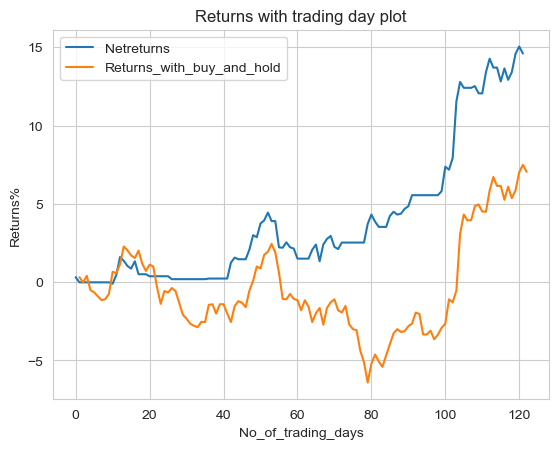

In [295]:
data_buy_and_hold = pd.DataFrame(new_merg["Date"].unique(),columns=["Date"])
data_buy_and_hold['trade_position']=1
data_buy_and_hold['strategy_returns']=index['returns'] * (data_buy_and_hold['trade_position'])
data_buy_and_hold=data_buy_and_hold.dropna()
returns_with_buy_and_hold=data_buy_and_hold['strategy_returns'].cumsum()
plt.plot(100*Netreturns, label='Netreturns')
plt.plot(100*returns_with_buy_and_hold, label='Returns_with_buy_and_hold')

plt.xlabel('No_of_trading_days')
plt.ylabel('Returns%')
plt.title('Returns with trading day plot')
plt.legend()

plt.show()

## Visualising Trades Taken

In [296]:
def plot_function(signals):
  fig=plt.figure(figsize=(14,8))
  bx = fig.add_subplot(111)
  l1 = bx.plot(signals['Index'], c='#4abdac')
  u1 = bx.plot(signals['Index'][signals['to_plot'] == 1], lw=0, marker='^', markersize=6, c='g')
  u2 = bx.plot(signals['Index'][signals['to_plot'] == -1], lw=0, marker='v', markersize=6, c='r')
  plt.title('TRADES ON BANKNIFTY')
  plt.legend(['Price', 'Buy', 'Square-Off'])

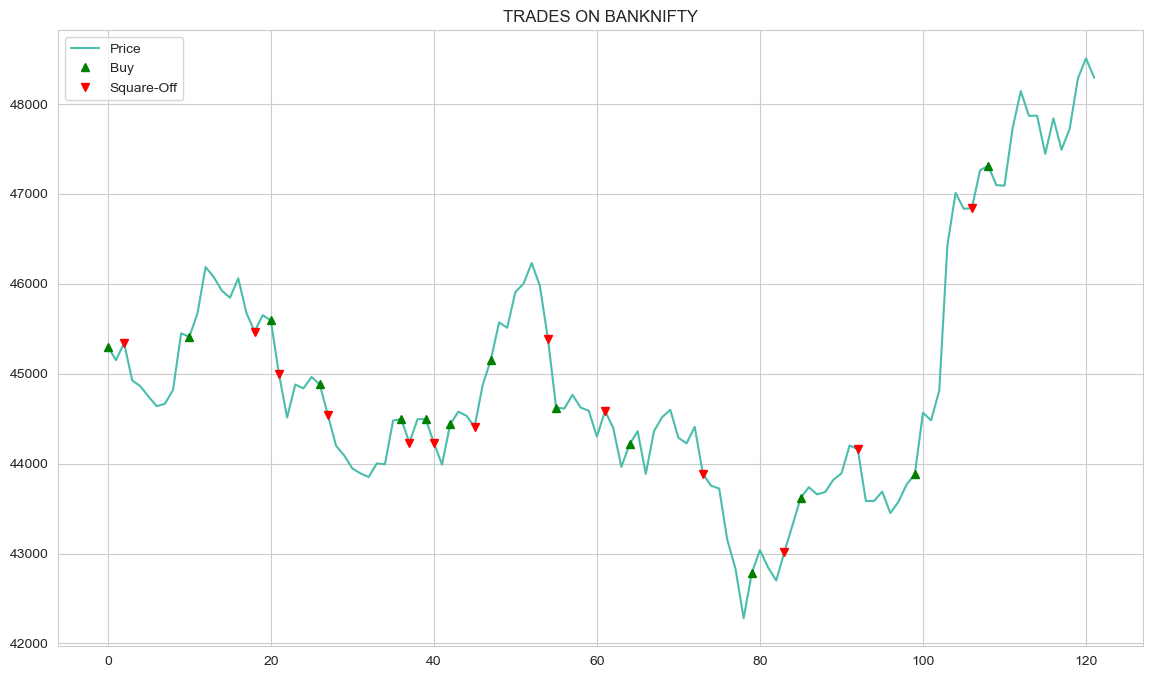

In [297]:
plot_function(Strategy)

## Performance Metrics

In [298]:
print("No of trades taken:",Strategy['to_plot'].value_counts()[1])

No of trades taken: 14


In [299]:
flag=0
worst_trade=100
for i in range(122):
    if((Strategy['to_plot'][i]==1)and(flag!=1)):
        flag=1
        cur=Strategy['Index'][i]
    elif(Strategy['to_plot'][i]==-1):
        flag=-1
        worst_trade=min(worst_trade,(Strategy['Index'][i]-cur)/cur)
print("The Worst Trade gave returns of:",100*worst_trade,"%")
        

The Worst Trade gave returns of: -1.308988934583534 %


In [300]:
flag=0
best_trade=0
for i in range(122):
    if((Strategy['to_plot'][i]==1)and(flag!=1)):
        flag=1
        cur=Strategy['Index'][i]
    elif(Strategy['to_plot'][i]==-1):
        flag=-1
        best_trade=max(best_trade,(Strategy['Index'][i]-cur)/cur)
print("The Best Trade gave returns of:",100*best_trade,"%")
        

The Best Trade gave returns of: 6.746547813169651 %


In [303]:
flag=0
sum_profit_trades=0
cnt=0
for i in range(122):
    if((Strategy['to_plot'][i]==1)and(flag!=1)):
        flag=1
        cur=Strategy['Index'][i]
    elif(Strategy['to_plot'][i]==-1):
        flag=-1
        if(((Strategy['Index'][i]-cur)/cur)>0):
            sum_profit_trades+=((Strategy['Index'][i]-cur)/cur)
            cnt+=1
        
print("Average Profitable Trade is:",100*(sum_profit_trades/cnt),"%")
     

Average Profitable Trade is: 1.5425887617628047 %
